# Text Analysis with Python

Textual analysis is an essential tool in many fields today. With the rise of the internet and freely available data, it is easier than ever to download some text and analyse it. 

In this notebook, we will learn how to do textual analysis using some data from Twitter.

## Table of contents:
- [1. Removing unnecessary data](#remove)
- [2. Filtering the text](#filter)
- [3. Wordclouds](#wordcloud)
- [4. Sentiment analysis](#sentiment)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Let us first load the dataset we are going to be using.

The data for this notebook is extracted from the University of Edinburgh twitter account. It contains all tweets from 20/08/2014 to 07/02/2019, and there are some quite exciting finds in it!

The data is initially loaded in a pandas DataFrame, and it is recommended that you keep it inside that for the whole notebook.

The columns of the data are:
- `text` - the tweet itself
- `screen_name` - the name of the account that tweeted the tweet
- `created_at` - timestamp of the tweet. Contains date and time of publishing
- `retweet_count` - how many people have shared the tweet
- `favourite_count` - how many people have liked the tweet

Run the cell below to load the data and see the first 5 columns

In [2]:
# first load the dataset
df = pd.read_csv("data/uoe_tweets_07022019.csv", index_col=0)
df.head()

,text,screen_name,created_at,retweet_count,favorite_count
0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07 09:54:30,1,0
1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06 16:42:02,18,30
2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06 11:57:46,13,38
3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05 17:08:06,3,4
4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05 16:20:02,10,19


Now with that out of the way, let's begin doing some text analysis

## 1. Removing unnecessary data <a name="remove"></a>

From the dataset, it is quite evident that we don't need the `screen_name` column as all of the tweets are only from the @EdinburghUni profile. We can also consider simplifying the `created_at` column as we don't need the exact time of publication.

Let's now extract only the date of the tweet. We have access to the `DateTime` object but don't worry about the details here.

In [3]:
# extract only date
df["date"] = df.created_at.str.slice(0,10)
df["date"] = pd.to_datetime(df.date)
df.head()

,text,screen_name,created_at,retweet_count,favorite_count,date
0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07 09:54:30,1,0,2019-02-07
1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06 16:42:02,18,30,2019-02-06
2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06 11:57:46,13,38,2019-02-06
3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05 17:08:06,3,4,2019-02-05
4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05 16:20:02,10,19,2019-02-05


### Exercise 1
Remove the `screen_name` and `created_at` columns from the dataframe above

In [4]:
df = df.drop(["screen_name", "created_at"], axis=1)
df.head()

,text,retweet_count,favorite_count,date
0,RT @EdinUniStaff: Congratulations to the three...,1,0,2019-02-07
1,The Erasmus+ programme provides tangible benef...,18,30,2019-02-06
2,.@EdinburghUni values the opportunities Erasmu...,13,38,2019-02-06
3,A study of the Universe involving Edinburgh’s ...,3,4,2019-02-05
4,"Over 200 genes have been linked to depression,...",10,19,2019-02-05


# 2. Filtering the text <a name="filter"></a>
A critical stage of any text processing.

First, let us convert all characters to lowercase. This avoids having multiple copies of the same words. For example in the previous word counting exercise, the words `Edinburgh` and `edinburgh` would be considered two different words, whereas they are the same!

In [5]:
# convert to lowercase
df.text = df.text.str.lower()
df.head()

,text,retweet_count,favorite_count,date
0,rt @edinunistaff: congratulations to the three...,1,0,2019-02-07
1,the erasmus+ programme provides tangible benef...,18,30,2019-02-06
2,.@edinburghuni values the opportunities erasmu...,13,38,2019-02-06
3,a study of the universe involving edinburgh’s ...,3,4,2019-02-05
4,"over 200 genes have been linked to depression,...",10,19,2019-02-05


Now let's remove punctuation. It is possible to use the `.strip()` method but that doesn't catch all punctuation characters like `%` or `#`. Instead, we would like to use the `.replace` method combined with regular expressions.

### Exercise 2
Complete the code below in such a way that you catch as many punctuation characters as you can!

For this, you will have to use regular expressions. If you are not familiar with them, you can have a look at this [webpage](https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas)

*Note: the template code below stores the cleaned up text in a separate column. Once you are happy with the filtering just put the filtered text in the `text` column*

In [6]:
df_test = df["text"].str.replace("put regex here", "")
df_test.head()

0    rt @edinunistaff: congratulations to the three...
1    the erasmus+ programme provides tangible benef...
2    .@edinburghuni values the opportunities erasmu...
3    a study of the universe involving edinburgh’s ...
4    over 200 genes have been linked to depression,...
Name: text, dtype: object

In [7]:
df["text"] = df["text"].str.replace("[^\w\s]", "")
df.head()

,text,retweet_count,favorite_count,date
0,rt edinunistaff congratulations to the three e...,1,0,2019-02-07
1,the erasmus programme provides tangible benefi...,18,30,2019-02-06
2,edinburghuni values the opportunities erasmus ...,13,38,2019-02-06
3,a study of the universe involving edinburghs p...,3,4,2019-02-05
4,over 200 genes have been linked to depression ...,10,19,2019-02-05


### Exercise 3

It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day.

You can use the `DataFrame.groupby()` method to fund occurrences. Don't forget to label the axis of your plot.

You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method

In [8]:
counts = df.groupby("date").count()
counts.head()

,text,retweet_count,favorite_count
date,,,
2014-08-20,2,2,2
2014-08-22,1,1,1
2014-08-23,1,1,1
2014-08-24,2,2,2
2014-08-25,2,2,2


Text(0.5,1,'Number of tweets by @EdinburghUni')

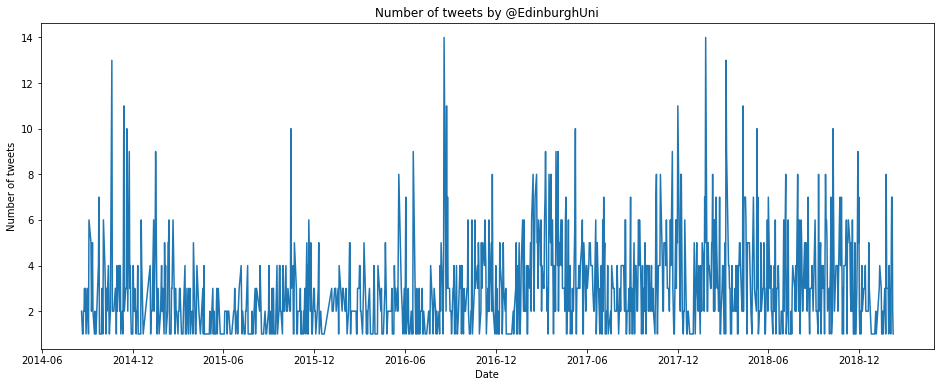

In [9]:
plt.figure(figsize=(16,6))
plt.plot(counts.index, counts.favorite_count)
plt.xlabel("Date")
plt.ylabel("Number of tweets")
plt.title("Number of tweets by @EdinburghUni")


### Exercise 4
Here we will identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe.

Find the 10 most popular posts, print them and see what they are about!

You might want to use the `.iloc` method to index into the original data

In [10]:
idx = df.favorite_count.nlargest(10)

df.iloc[list(idx.index)]

,text,retweet_count,favorite_count,date
2625,tickets now available for public talk by bolly...,1764,3725,2015-10-05
1434,congratulations to canadian pm justintrudeau w...,650,2553,2017-07-05
1320,scientists have developed a camera that can se...,546,798,2017-09-04
591,were ranked in world top 20 in the qs world un...,273,574,2018-06-06
1033,were number 2 on the timeshighered list of 10 ...,183,522,2018-01-03
1688,edinburgh is and will remain a proudly europea...,355,492,2017-03-29
1594,celebrate dance today for the internationaldan...,379,478,2017-04-29
2606,congratulations dr shah rukh khan honorary gra...,648,474,2015-10-15
1034,wishing all of our students staff amp friends ...,98,463,2018-01-01
965,bill gates says some of the worlds best resear...,195,448,2018-01-26


# 3. Wordclouds <a name="wordcloud"></a>
Who doesn't like them right?

Wordclouds is a picture which consists of bundled words from a piece of text. The higher the occurrence of the words, then the larger the text of the cloud is!

The easiest way to create wordclouds in Python is with the `wordcloud` package. Before using it, however, we must first download it. Run the cell below to do just that

In [11]:
# Creating a wordcloud
# first need to install
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/ae/af/849edf14d573eba9c8082db898ff0d090428d9485371cc4fe21a66717ad2/wordcloud-1.5.0-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now that we are ready to go, let's import the package and creata a small wordcloud from arbitrary words

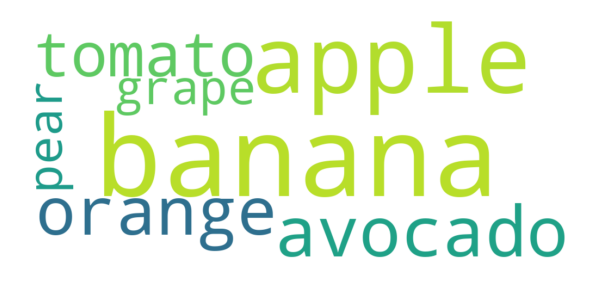

In [12]:
import wordcloud as ws

words = "avocado banana apple orange tomato banana apple banana grape pear"

wordcloud = ws.WordCloud(width=1000, height=500, background_color="white").generate(words)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Exercise 5

Now that you know how to create a wordcloud, can you create one with all of the tweets we have in our dataset?

*Hint: you will have to use an `str` method to concatenate all of the tweets into one big block of text.* 

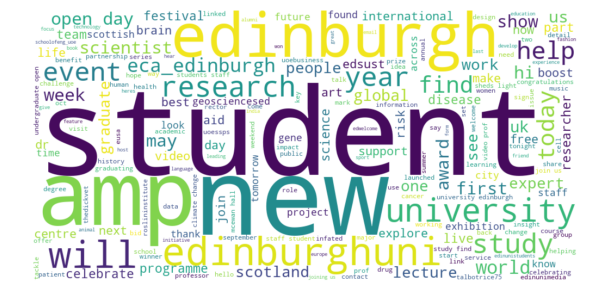

In [13]:
import wordcloud as ws

wordcloud = ws.WordCloud(width=1000, height=500, background_color="white").generate(df.text.str.cat())
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 4. Sentiment analysis <a name="sentiment"></a>

Here we will detect the sentiment of the tweets; that is we will find the polarity and subjectivity of the tweet.

For that, we will be using the `textblob` package (which we have to install first). Let's first see how we can use it on a small example of just the first 5 tweets.

In [14]:
# run this cell to install the package
!pip install textblob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


One of the incredibly useful tools in text analysis is **lambda functions**. These are shorthand functions which you can use when you want to define a simple function but don't want to go through the whole process with the `def` keyword.

They have the format
```python
lambda arguments: expression
```
but are best understood through an example:

In [15]:
# define normal functino
def square(x):
    return x ** 2

# define lambda function
f = lambda x: x**2

In [16]:
# Both have the same output
print(square(5))
print(f(5))

25
25


Now that you know how `lambda` functions work, let's put them t the test!

In [17]:
from textblob import TextBlob

# select only 5 tweet
tweet = df.text[0:5]
tweet

0    rt edinunistaff congratulations to the three e...
1    the erasmus programme provides tangible benefi...
2    edinburghuni values the opportunities erasmus ...
3    a study of the universe involving edinburghs p...
4    over 200 genes have been linked to depression ...
Name: text, dtype: object

In [18]:
# do sentiment analysis
tweet.apply(lambda x: TextBlob(x).sentiment[0])

0    0.136364
1    0.000000
2    0.100000
3    0.000000
4    0.400000
Name: text, dtype: float64

What does this mean?

The values you would expect are within a range of \[-1; 1\]. A number closer to 1 means that the text has a positive statement and values closer to -1 means that the text has a negative statement.

Bear in mind that this is using a machine learning model which is naturally prone to errors.

### Exercise 6

Apply sentiment analysis to the dataset of tweets. Find the most positive tweet and the most negative tweet. Does the sentiment analysis of `TextBlob` perform well?

*Hint: you might want to store the sentiment inside `df` for convenience*

In [19]:
from textblob import TextBlob

# do sentiment analysis
df["sentiment"] = df.text.apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,text,retweet_count,favorite_count,date,sentiment
0,rt edinunistaff congratulations to the three e...,1,0,2019-02-07,0.136364
1,the erasmus programme provides tangible benefi...,18,30,2019-02-06,0.000000
2,edinburghuni values the opportunities erasmus ...,13,38,2019-02-06,0.100000
3,a study of the universe involving edinburghs p...,3,4,2019-02-05,0.000000
4,over 200 genes have been linked to depression ...,10,19,2019-02-05,0.400000


In [20]:
idx = df.sentiment.nlargest(5)
df.iloc[list(idx.index)]

,text,retweet_count,favorite_count,date,sentiment
91,danidestler hello the best people to speak to ...,0,1,2018-12-12,1.0
100,enabling cancer survivors to have children edi...,13,45,2018-12-06,1.0
115,wishing everyone a very happy st andrews day\n...,91,299,2018-11-30,1.0
333,breast milk may be best for premature babies b...,2,18,2018-09-21,1.0
527,rt edinunimedicine one of our wonderful edinbu...,6,0,2018-07-05,1.0


In [21]:
idx = df.sentiment.nsmallest(5)
df.iloc[list(idx.index)]

,text,retweet_count,favorite_count,date,sentiment
1090,rt edininnovations if the screeching voice of ...,21,0,2017-11-30,-1.0
2702,ecci sets up hong kong base httptcoewkkdsogck,10,3,2015-07-30,-0.8
1284,painful side effects from cancer medicines cou...,12,10,2017-09-15,-0.7
1547,women drive quest for insights into painful in...,4,1,2017-05-19,-0.7
10,antibiotic may selectively kill dangerous skin...,7,10,2019-02-04,-0.6
